K-menas on shopping data ( we will choose only two columns for better visulazion )

In [38]:
cd downloads

[WinError 2] The system cannot find the file specified: 'downloads'
c:\users\deepu\downloads


In [39]:
pwd

'c:\\users\\deepu\\downloads'

In [40]:
cd c:\\users\deepu\downloads


c:\users\deepu\downloads


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
demo = pd.read_csv('shopping_data.csv')

In [43]:
demo

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [44]:
demo.drop(['CustomerID','Genre','Age'], axis = 1,inplace = True)

In [45]:
demo

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [46]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


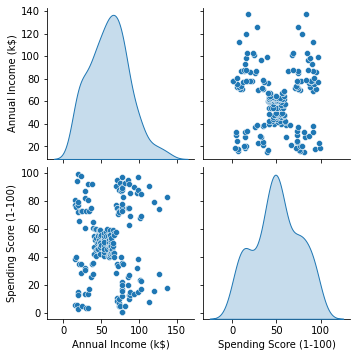

In [47]:
sns.pairplot(demo,diag_kind = 'kde')

In [48]:
# let's see the skew ness of the data as it might create a cluster of it's own because it is not outlier robust 
print('skewness of anual salary ()',demo['Annual Income (k$)'].skew())

skewness of anual salary () 0.3218425498619055


In [49]:
demo['Spending Score (1-100)'].skew()

-0.047220201374263374

# let's do power transformation here 

In [51]:
from sklearn.preprocessing import PowerTransformer
power_transformer = PowerTransformer(method= 'yeo-johnson', standardize = True)
transformed_data = power_transformer.fit_transform(demo)

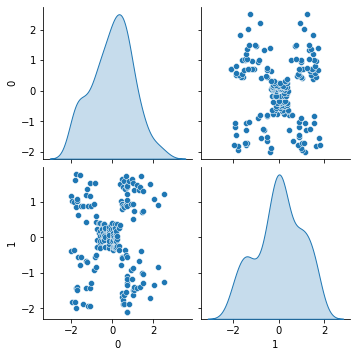

In [52]:
sns.pairplot(pd.DataFrame(transformed_data),diag_kind = 'kde')

In [53]:
pd.DataFrame(transformed_data).iloc[:,1].skew()

-0.2233771268577908

In [54]:
pd.DataFrame(transformed_data).iloc[:,0].skew()

-0.06377994804763616

In [55]:
# let's do the square root and log 
import numpy as np

# Assuming 'data' is your dataset
transformed_data = np.sqrt(demo['Spending Score (1-100)'])


In [56]:
transformed_data.skew()

-0.7097902805855728

In [59]:
demo['Spending Score (1-100)'].skew()

-0.047220201374263374

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

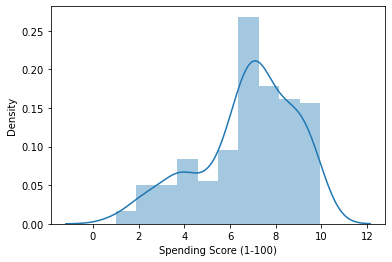

In [60]:
sns.distplot(transformed_data)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

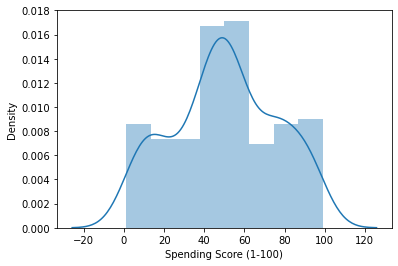

In [61]:
sns.distplot(demo['Spending Score (1-100)'])